In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### Examen 1 : Parte 2
#### Zamorano Presa Miguel Ángel


In [4]:
pwd!

'/home/sistemas/m/septim/stats-H/lin-r'

In [37]:
df = pd.read_csv("/home/sistemas/m/septim/datasets/scrap price.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [38]:
df_numericas = df.select_dtypes(include=[np.number])

In [9]:
df_numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 25.8 K

In [10]:
scaler = StandardScaler()
scaler.fit(df_numericas)

StandardScaler()

In [33]:
scaled_data = scaler.transform(df_numericas)
df_scaled = pd.DataFrame(scaled_data, columns=df_numericas.columns)
pca = PCA( )
compo = pca.fit_transform(df_scaled)

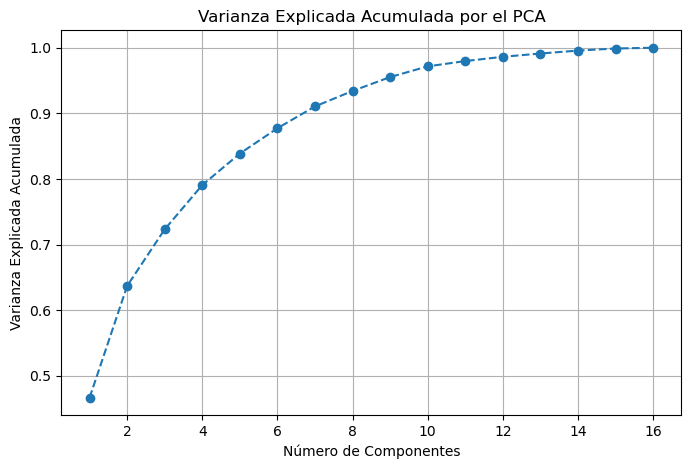

In [34]:
explained_variance = pca.explained_variance_ratio_

# Varianza acumulada
cumulative_variance = np.cumsum(explained_variance)

# Graficar la varianza explicada y la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por el PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()



### 2. guardamos el resultado de aplicar PCA quedandonos con los primeros 2 componentes principales

In [36]:
pca = PCA( n_components=2 )
compo2 = pca.fit_transform(df_scaled)

print(compo2.shape)
df_pca = pd.DataFrame(data=compo2, columns=["PC1", "PC2"])
df_pca

(205, 2)


,PC1,PC2
0,-0.858461,-2.896491
1,-0.738503,-2.934044
2,0.315441,-1.737109
3,-0.309655,-0.899207
4,1.102059,-1.768351
...,...,...
200,2.816915,1.377200
201,3.626328,0.765369
202,3.629319,0.579270
203,2.565162,3.324743


### calculamos los coeficientes Beta para el dataset original

In [41]:
y = df_numericas["price"]
df_numericas = df_numericas.drop(columns=["price"])
xtrain, xtest, ytrain, ytest = train_test_split(df_numericas, y, train_size=0.8)
lir = LinearRegression()

# Ajustar el modelo
lir.fit(xtrain, ytrain)

# Predecir los valores
ypred = lir.predict(xtest)

# Mostrar los resultados
print("Coeficientes:", lir.coef_)
print("Intercepto:", lir.intercept_)
print("R^2 en el conjunto de entrenamiento:", lir.score(xtrain, ytrain))
print("R^2 en el conjunto de prueba:", lir.score(xtest, ytest))


Coeficientes: [-1.84756596e+01  2.53822860e+02  1.33008993e+02 -2.33548592e+01
  5.02499740e+02  1.88345080e+02  8.03299963e-01  9.81597059e+01
 -1.49865855e+02 -3.28342945e+03  3.26572096e+02  4.58504428e+01
  1.63762956e+00 -1.39116673e+02  8.94415978e+01]
Intercepto: -56381.88713685161
R^2 en el conjunto de entrenamiento: 0.8431231758391944
R^2 en el conjunto de prueba: 0.9196832450999635


### Lo mismo pero con el dataset reducido ( PCA)

In [44]:
#y = df_numericas["price"]
#df_numericas = df_numericas.drop(columns=["price"])
xtrain, xtest, ytrain, ytest = train_test_split(df_pca, y, train_size=0.8)
lir = LinearRegression()

# Ajustar el modelo
lir.fit(xtrain, ytrain)

# Predecir los valores
ypred = lir.predict(xtest)

# Mostrar los resultados
print("Coeficientes:", lir.coef_)
print("Intercepto:", lir.intercept_)
print("R^2 en el conjunto de entrenamiento:", lir.score(xtrain, ytrain))
print("R^2 en el conjunto de prueba:", lir.score(xtest, ytest))

Coeficientes: [ 2539.65428976 -1051.17407929]
Intercepto: 13226.146286571919
R^2 en el conjunto de entrenamiento: 0.7874378864313866
R^2 en el conjunto de prueba: 0.7379302915423119
